In [2]:
import matplotlib.pyplot as plt 
from numpy import pi, sqrt, exp, log, e, Infinity
import numpy as np

import random as r

In [3]:
spc = 0.25
sof = 0.3
LOOKAHEAD_TIME = 15000
FORGET_THRESHOLD = -0.8
DEFAULT_ALPHA = 0.3
C = 0.25
F = 1.0
s = 0.3 # noise


In [4]:
def trace_decay(itimes, id, time, SOF, SPC):
    if len(id) == 0:
        return SOF
    sum = 0
    i = 0

    nd = SPC * e**(method_actv(itimes, id, time)) + SOF
    
    return nd

def method_actv(itimes, id, time):
    sum = 0
    i = 0
    while i < len(itimes) and itimes[i] < time:
        sum += (time - itimes[i]) ** (-1*id[i])
        i += 1
    actv = log(sum)
    return min(actv, 10)


def log_odds(itimes, times, SOF, SPC):
    
    id = []

    i = 0
    while i < len(itimes) and itimes[i] < times[len(times) - 1]:
        i += 1
    sel_itimes = itimes[0 : i]


    for itime in sel_itimes:
        id.append(trace_decay(sel_itimes, id, itime, SOF, SPC))
    
    actv = []
    for time in times:
        actv.append(method_actv(itimes, id, time))

    return actv

def prob_correct(activation, threshold, noise):
    """Retrieval probability of a memory with a given activation, threshold, and noise"""  
    return 1 / (1 + exp((-activation + threshold) / noise))

C:\Users\Frankie\AppData\Local\Temp\ipykernel_23236\3391675646.py:17: RuntimeWarning: divide by zero encountered in log
  actv = log(sum)


<function matplotlib.pyplot.show(close=None, block=None)>

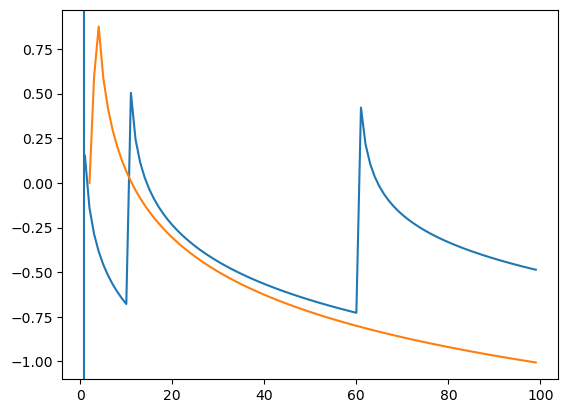

In [5]:
spaced_traces = [0.4, 10.3, 60.1]
trauma_traces = [1, 2, 3]
times = [x for x in range(100)]
spaced_actvs = log_odds(spaced_traces, times, sof, spc)
trauma_actvs = log_odds(trauma_traces, times, sof, spc)

plt.plot(times, spaced_actvs)
plt.plot(times, trauma_actvs)
plt.axvline(0.9)
plt.show

In [6]:

class memory(object):

    #Memory class represents a memory that contains traces and decays related to those traces."
    #Fields:
        #sof: speed of forgetting of memory
        #spc: spacing coefficent of memory
        #traces: list of traces of memory
        #id: list of decay in order with each trace
    #traces must be added in order (might fix later)


    def __init__(self, sof, spc, s, F) -> None:

        "Initializes memory"
        #sof: speed of forgetting of memory
        #spc: spacing coefficent of memory

        self.sof = sof
        self.spc = spc
        self.traces = []
        self.id = []
        self.s = s
        self.F = F

    def set_traces(self, traces):

        "entirely replaces current traces with parameterized traces"
        #traces: traces to replace old traces

        self.traces = traces

        for trace in self.traces:
            self.id.append(self.trace_decay(trace))


    def add_trace(self, time):

        "Adds trace to memory traces."
        #time: time of trace to be added

        if self.traces.__contains__(time):
            raise Exception(f"{time} has already been added as a trace")
        self.traces.append(time)
        self.id.append(self.trace_decay(time))

    def trace_decay(self, time):

        "helper method for add_trace"

        if len(self.id) == 0:
            return self.sof
        
        nd = self.spc * e**(self.get_actv(time)) + self.sof
    
        return nd
    
    def get_actv(self, time):

        "returns activation of time"
        #time that will have its activation returned

        if len(self.traces) == 0:
            return -(Infinity)

        sum = 0
        i = 0
        while i < len(self.traces) and self.traces[i] < time:
            sum += (time - self.traces[i]) ** (-1*self.id[i])
            i += 1
        actv = log(sum)
        return min(actv, 10)
    
    #latency?

    def get_resp_time_dis(self, time, t0=0.6):
        beta = sqrt(3) / (pi * self.s)
        alpha = e ** -(self.get_actv(time))
        prob = (beta / (self.F * alpha)) * (((time - t0) / (self.F * alpha)) ** (beta - 1))
        prob = prob / ((1 + ((self.F * (time - t0)) / (self.F * alpha)) ** beta) ** 2) 
        return prob

    def get_resp_acc(self, time, thresh):
        prob = 1 / (1 + e ** ((-1 * self.get_actv(time) - thresh) / self.s))
        return prob
    

In [7]:
m = memory(sof, spc,  0.3, 1)
traces = [0.4, 10.3, 90.1]
for trace in traces:
    m.add_trace(trace)
m.get_actv(100)

-0.22894587137932307

C:\Users\Frankie\AppData\Local\Temp\ipykernel_23236\1754911392.py:70: RuntimeWarning: divide by zero encountered in log
  actv = log(sum)


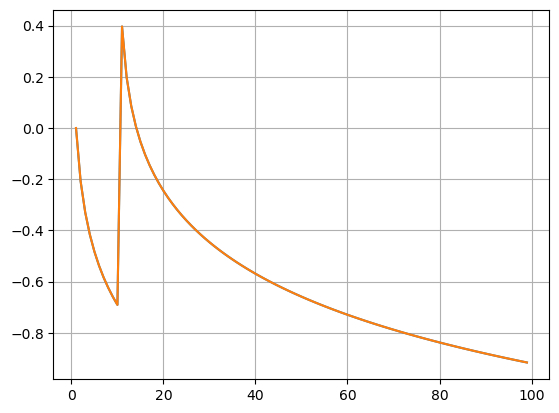

In [8]:
spaced_traces = [0.4, 10.3, 60.1]
trauma_traces = [1, 2, 3]
traces = [0, 10]
sm = memory(0.3, 0.25, 0.3, 1)
tm = memory(0.3, 0.25, 0.3, 1)
points = 100
sm.set_traces(traces)
tm.set_traces(traces)


spaced_actvs = [sm.get_actv(x) for x in range(points)]
trauma_actvs = [tm.get_actv(x) for x in range(points)]

plt.plot(range(points), spaced_actvs)
plt.plot(range(points), trauma_actvs)
plt.grid()
plt.show()

C:\Users\Frankie\AppData\Local\Temp\ipykernel_23236\1754911392.py:70: RuntimeWarning: divide by zero encountered in log
  actv = log(sum)


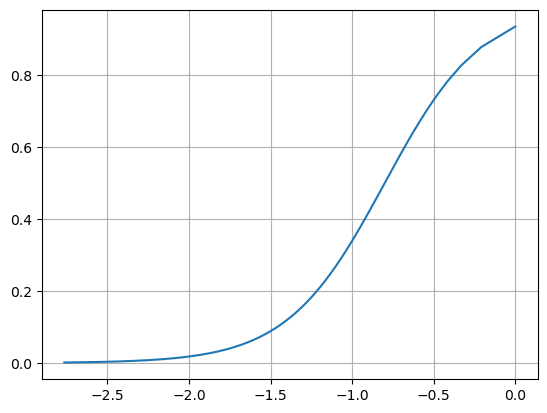

In [9]:
m = memory(0.3, 0.25, 0.3, 1)
traces = [0]
m.set_traces(traces)

ats = [m.get_actv(x) for x in range(10000)]
pc = [m.get_resp_acc(x, 0.8) for x in range(10000)]

plt.plot(ats, pc)
plt.grid()
plt.show()


In [10]:
m = memory(0.3, 0.25,  0.3, 1)
traces = [0]
m.set_traces(traces)

time = [x / 10 for x in range(100)]

rime = [m.get_resp_time_dis(x, s, 0.3) * x for x in time]

print(sum(rime))

prob = [m.get_resp_time_dis(x, s, 0.6) for x in time]

plt.plot(time, prob)
plt.grid()
plt.show()

TypeError: memory.get_resp_time_dis() takes from 2 to 3 positional arguments but 4 were given